3Blue1Brown - Youtube chanel
   * But what is a convolution? - https://www.youtube.com/watch?v=KuXjwB4LzSA

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
c = np.array([7, 8])

In [4]:
np.convolve(a, b)

array([ 4, 13, 28, 27, 18])

In [5]:
np.convolve(b, c)

array([28, 67, 82, 48])

In [11]:
def convolution(a, b):
    k = len(a)
    l = len(b)
    N = k + l - 1
    out = []
    for n in range(N):
        sum = 0
        for i in range(k):
            if (n-i) >= 0 and (n-i) < min(k, l):
                sum += a[i] * b[n-i]
        out.append(sum)
    return out

In [12]:
convolution(a, b)

[4, 13, 28, 27, 18]

In [13]:
convolution(b, c)

[28, 67, 82, 48]

### Moving averages

In [2]:
a = np.append(np.repeat(0.1, 5), (np.repeat(1.0, 5)))
a = np.hstack((a, a))

In [3]:
b = np.repeat(0.2, 5)

In [5]:
c = [0] * len(a)
n = len(b)
m = len(b)
for i in range(len(a)):
    if i <= (len(a) - n):
        c[i] = np.dot(a[i:min(i+n, len(a))], b)
        #print(c[i])
    else:
        m -= 1
        # print('min(i+n, len(a))=', min(i+n, len(a)))
        # print('a[i:min(i+n, len(a))]=', a[i:min(i+n, len(a))])
        # print('b[0:m]=', b[0:m])
        c[i] = np.dot(a[i:min(i+n, len(a))], b[0:m])

In [2]:
arr1 = np.random.random(100000)
arr2 = np.random.random(100000)

In [3]:
%%timeit
np.convolve(arr1, arr2)

1.15 s ± 52.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [4]:
import scipy.signal

In [5]:
%%timeit
scipy.signal.fftconvolve(arr1, arr2)

9.7 ms ± 59.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [6]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

In [7]:
scipy.signal.fftconvolve(a, b)

array([ 4., 13., 28., 27., 18.])

In [2]:
import os
import cv2

In [3]:
def load_image(image_path):
    color_img = cv2.imread(image_path)
    grey_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)
    return grey_img

In [21]:
blur_3x3 = np.array(([1, 1, 1], [1, 1, 1], [1, 1, 1]), dtype='int')

blur_5x5 = np.array(([1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1],
                     [1, 1, 1, 1, 1], [1, 1, 1, 1, 1]), dtype='int')

In [4]:
color_img = cv2.imread('input_image.jpg')

In [5]:
color_img.shape

(576, 768, 3)

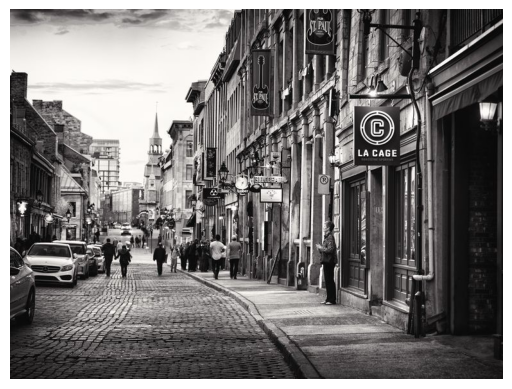

In [8]:
plt.imshow(color_img);
plt.axis('off');

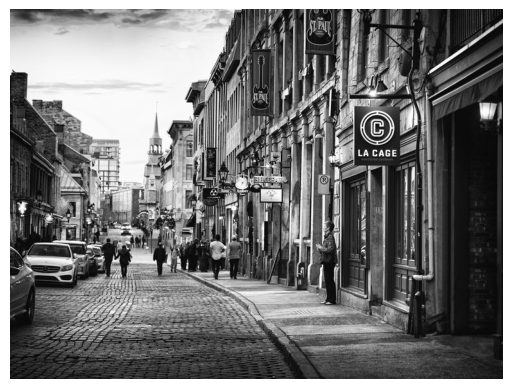

In [9]:
gray_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_img, cmap='gray')
plt.axis('off');

In [10]:
def convolve2d(image, kernel):
    """
    This function which takes an image and a kernel and returns the convolution of them.

    :param image: a numpy array of size [image_height, image_width].
    :param kernel: a numpy array of size [kernel_height, kernel_width].
    :return: a numpy array of size [image_height, image_width] (convolution output).
    """
    # Flip the kernel
    kernel = np.flipud(np.fliplr(kernel))
    # convolution output
    output = np.zeros_like(image)

    # Add zero padding to the input image
    image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2))
    image_padded[1:-1, 1:-1] = image

    # Loop over every pixel of the image
    for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            # element-wise multiplication of the kernel and the image
            output[y, x] = (kernel * image_padded[y: y+3, x: x+3]).sum()

    return output

In [11]:
# kernel for sharpened image
KERNEL = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
KERNEL

array([[ 0, -1,  0],
       [-1,  5, -1],
       [ 0, -1,  0]])

In [12]:
img_sharpened = convolve2d(gray_img, kernel=KERNEL)

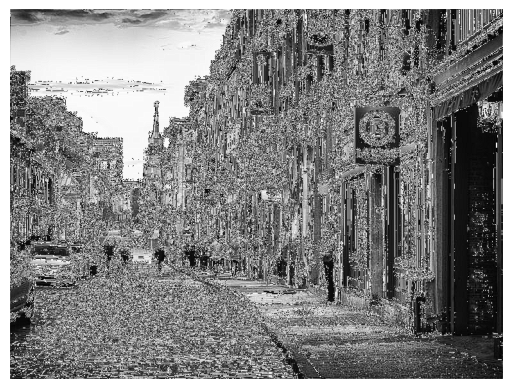

In [13]:
plt.imshow(img_sharpened, cmap='gray')
plt.axis('off');

In [14]:
# kernel for edge detection (edge1)
KERNEL = np.array([[-1, -1, -1], [-1, 4, -1], [-1, -1, -1]])
KERNEL

array([[-1, -1, -1],
       [-1,  4, -1],
       [-1, -1, -1]])

In [15]:
# kernel for edge detection (edge2)
KERNEL = np.array([[-1, 0, 1], [0, 0, 0], [1, 0, -1]])
KERNEL

array([[-1,  0,  1],
       [ 0,  0,  0],
       [ 1,  0, -1]])

In [16]:
# kernel for box blur
KERNEL = np.array([[1/9, 1/9, 1/9], [1/9, 1/9, 1/9], [1/9, 1/9, 1/9]])
KERNEL

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [17]:
img_blur = convolve2d(gray_img, kernel=KERNEL)    # box blur

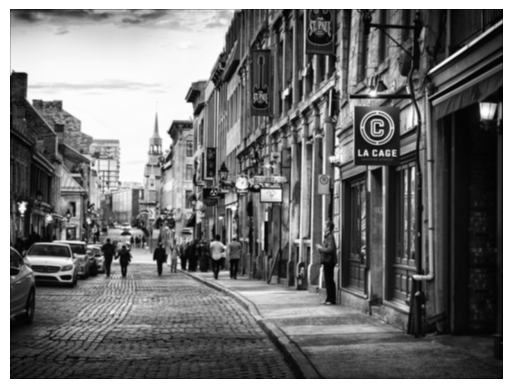

In [18]:
plt.imshow(img_blur, cmap='gray')
plt.axis('off');

In [ ]:
cv2.imwrite('box_blur.jpg', img_blur)

In [24]:
# kernel for gaussian blur
KERNEL = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])/16.0
KERNEL

array([[0.0625, 0.125 , 0.0625],
       [0.125 , 0.25  , 0.125 ],
       [0.0625, 0.125 , 0.0625]])

In [19]:
def convolve2d_5x5(image, kernel):
    """
    This function which takes an image and a kernel and returns the convolution of them.

    :param image: a numpy array of size [image_height, image_width].
    :param kernel: a numpy array of size [kernel_height, kernel_width].
    :return: a numpy array of size [image_height, image_width] (convolution output).
    """
    # Flip the kernel
    kernel = np.flipud(np.fliplr(kernel))
    # convolution output
    output = np.zeros_like(image)

    # Add zero padding to the input image
    image_padded = np.zeros((image.shape[0] + 4, image.shape[1] + 4))
    image_padded[2:-2, 2:-2] = image

    # Loop over every pixel of the image
    for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            # element-wise multiplication of the kernel and the image
            output[y, x] = (kernel * image_padded[y: y+5, x: x+5]).sum()

    return output

In [22]:
img_blur = convolve2d_5x5(gray_img, kernel=blur_5x5/25)

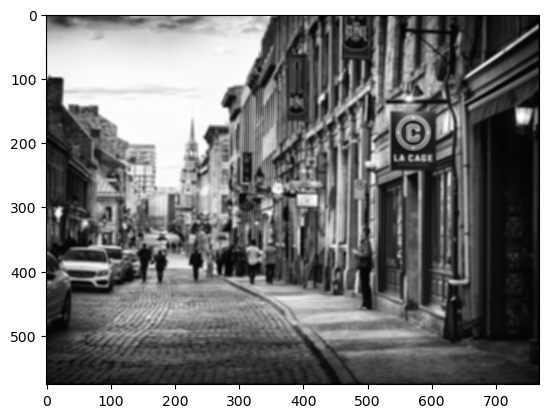

In [23]:
plt.imshow(img_blur, cmap='gray');

In [57]:
my_kernel = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
my_kernel

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [58]:
np.flipud(my_kernel)   # flip upside down

array([[7, 8, 9],
       [4, 5, 6],
       [1, 2, 3]])

In [59]:
np.fliplr(my_kernel)    # flip left to right

array([[3, 2, 1],
       [6, 5, 4],
       [9, 8, 7]])

In [60]:
np.flipud(np.fliplr(my_kernel))

array([[9, 8, 7],
       [6, 5, 4],
       [3, 2, 1]])

In [61]:
np.fliplr(np.flipud(my_kernel))

array([[9, 8, 7],
       [6, 5, 4],
       [3, 2, 1]])

In [89]:
output = np.zeros_like(img_mnist)
# kernel = np.array([[-1, -1, -1], [-1, 4, -1], [-1, -1, -1]])   # edge detection 1
kernel = np.array([[-1, 0, 1], [0, 0, 0], [1, 0, -1]])           # edge detection 2
# Loop over every pixel of the image
for x in range(21):        # img_mnist.shape[1]  - columns
    for y in range(21):    # img_mnist.shape[0]  - rows
        # element-wise multiplication of the kernel and the image
        output[y, x] = (kernel * image_padded[y: y+3, x: x+3]).sum()

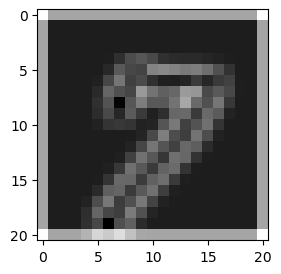

In [88]:
plt.imshow(output, cmap='gray');    # edge detection 1

In [7]:
#plt.imshow(output, cmap='gray');   # edge detection 2

https://www.youtube.com/watch?v=wEoyxE0GP2M&list=PL3FW7Lu3i5JvHM8ljYj-zLfQRF3EO8sYv&index=6

Lecture 6 | Training Neural Networks I

Stanford University School of Engineering

Let's look at some activation statistics

In [66]:
# assume some unit gaussion 10-D input data
D = np.random.randn(1000, 500)

In [15]:
hidden_layer_sizes = [500] * 10

In [18]:
nonlinearities = ['tanh'] * len(hidden_layer_sizes)

In [67]:
act = {'relu': lambda x: np.maximum(0, x),
       'tanh': lambda x: np.tanh(x)}
Hs = {}
for i in range(len(hidden_layer_sizes)):
    # input at this layer
    X = D if i == 0 else Hs[i-1]
    fan_in = X.shape[1]
    fan_out = hidden_layer_sizes[i]
    
    # layer initialization
    W = np.random.randn(fan_in, fan_out) * 0.01
    
    # matrix multiply
    H = np.dot(X, W)
    
    # nonlinearities
    H = act[nonlinearities[i]](H)
    
    # cache result on this layer
    Hs[i] = H

In [68]:
# look at distribution at each layer
print('input layer had mean %f and std %f' % (np.mean(D), np.std(D)))
layer_means = [np.mean(H) for H in Hs.values()]
layer_stds = [np.std(H) for H in Hs.values()]
for i in range(len(Hs)):
    print('hidden layer %d has mean %f and std %f' % (i+1, layer_means[i], layer_stds[i]))

input layer had mean 0.003349 and std 0.998566
hidden layer 1 has mean 0.003668 and std 0.215498
hidden layer 2 has mean 0.000080 and std 0.004740
hidden layer 3 has mean -0.000001 and std 0.000076
hidden layer 4 has mean 0.000000 and std 0.000002
hidden layer 5 has mean 0.000000 and std 0.000000
hidden layer 6 has mean 0.000000 and std 0.000000
hidden layer 7 has mean -0.000000 and std 0.000000
hidden layer 8 has mean -0.000000 and std 0.000000
hidden layer 9 has mean 0.000000 and std 0.000000
hidden layer 10 has mean -0.000000 and std 0.000000


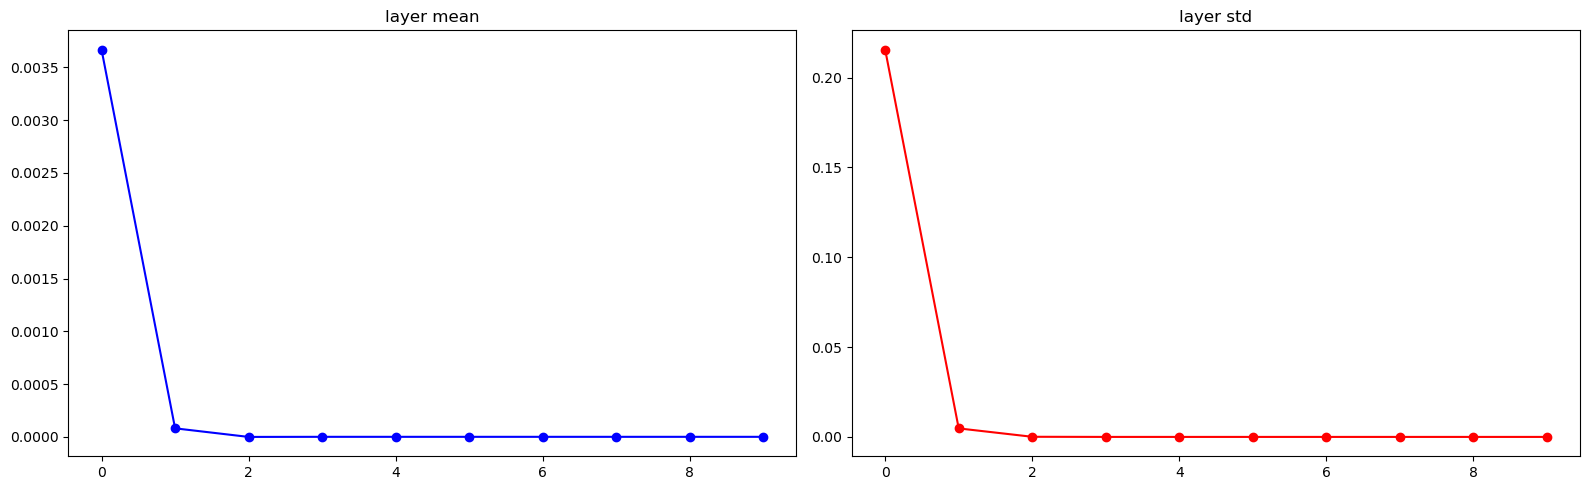

In [73]:
# plot the means and std
plt.figure(figsize=(16, 5))
plt.subplot(121)
plt.plot(Hs.keys(), layer_means, 'ob-')
plt.title('layer mean')
plt.subplot(122)
plt.plot(Hs.keys(), layer_stds, 'or-')
plt.title('layer std')
plt.tight_layout()

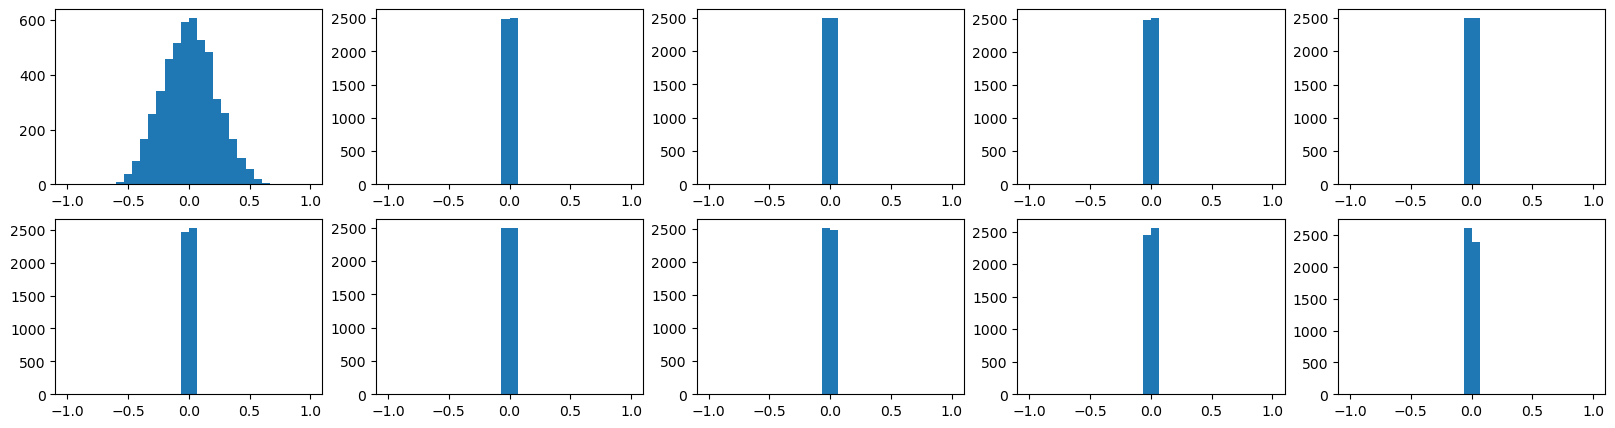

In [72]:
# plot the raw distributions
plt.figure(figsize=(20, 5))
for i, H in Hs.items():
    plt.subplot(2, 5, i+1)
    plt.hist(H.ravel(), 30, range=(-1, 1))

In [64]:
H.ravel()

array([-8.45987421e-19,  1.93235912e-17, -2.18037680e-17, -7.51829520e-18,
       -7.69318240e-18,  2.33121446e-18, -1.75487587e-17,  2.66089439e-17,
        5.49890270e-18,  7.63296123e-18, -4.84353301e-18, -2.41650739e-17,
       -1.13557642e-18,  2.02292950e-17,  6.86761830e-18,  7.07424287e-18,
       -1.40962050e-17,  4.56926064e-17, -3.58734599e-18,  8.48100351e-18,
        6.93670309e-18,  1.67222336e-17,  1.73027772e-17, -1.89927157e-17,
       -3.15649841e-18,  5.52844575e-18, -6.45354279e-18,  3.14801934e-17,
       -4.85834796e-18,  4.90531939e-18,  1.28121218e-17, -2.58894000e-17,
        8.32364991e-17, -6.65802857e-18,  1.55159548e-17,  8.95534413e-18,
        1.45986453e-18,  4.07909215e-17, -1.50274715e-17,  3.51346231e-18,
       -1.64997873e-17,  1.27469710e-17, -8.87268923e-17,  1.91668389e-17,
       -1.22474691e-17, -7.02607983e-18, -1.81778642e-17, -1.62346803e-17,
        1.94915316e-17,  3.67951209e-18])